<a href="https://colab.research.google.com/github/santoshi1007/Machine-Learning_1/blob/main/Chennai_house_price_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

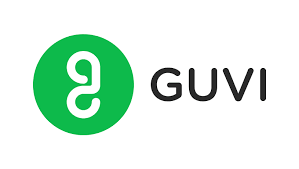





**ML-Chennai House Price Prediction**



Presented By: Santoshi Kumari Mishra

Batch-D10 (DS) 

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


# 1.Project Objectives :

Project Objectives : The objective of this project is to create a machine learning model. We are doing supervised learning for this model. Our aim is to find the important factors that contribute to the price.

it will be better to give a forecast range so that it will help the customers to negotiate.

List out the factor with affect the price of a house so that builder will make profit to focus that will effect the profit.

#2 :Modelling

**Modelling :**The analysis and model creation can be found in the .ipynb file.

The main packages used are numpy, pandas, matplotlib, seaborn and sklearn.


#3 :Important Pakage

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os,re
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,scale
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor


# 4:Data Loading and Description

IMPOTING THE FILE 

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.getcwd()
from google.colab import drive
drive.mount("/content/driver")

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [ ]:
path="/content/driver/MyDrive/train-chennai-sale (2).csv" 
df=pd.read_csv(path)

# 5: Information about the data set:

# a) head()

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


“ .head()”function of pandas library which returns first five observations of the data set.

#  b) shape of the dataset

In [ ]:
""" Check dataset """
#Check what does the dataset looks like

df.shape #(7109, 23)


(7109, 22)



I found out the total number of rows and columns in the data set using “.shape” .Dataset comprises of 7109 observations and 22 characteristics. Out of which one is dependent variable and rest 21 are independent variables.

# c) converted all columns into uppercase

In [ ]:
df.apply(lambda x:x.astype(str).str.upper())

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,KARAPAKKAM,1004,04-05-2011,131,1.0,1.0,3,ABNORMAL,YES,15-05-1967,COMMERCIAL,ALLPUB,PAVED,A,4.0,3.9,4.9,4.33,380000,144400,7600000
1,P09411,ANNA NAGAR,1986,19-12-2006,26,2.0,1.0,5,ABNORMAL,NO,22-12-1995,COMMERCIAL,ALLPUB,GRAVEL,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,ADYAR,909,04-02-2012,70,1.0,1.0,3,ABNORMAL,YES,09-02-1992,COMMERCIAL,ELO,GRAVEL,RL,4.1,3.8,2.2,3.09,421094,92114,13159200
3,P05346,VELACHERY,1855,13-03-2010,14,3.0,2.0,5,FAMILY,NO,18-03-1988,OTHERS,NOSEWR,PAVED,I,4.7,3.9,3.6,4.01,356321,77042,9630290
4,P06210,KARAPAKKAM,1226,05-10-2009,84,1.0,1.0,3,ABNORMAL,YES,13-10-1979,OTHERS,ALLPUB,GRAVEL,C,3.0,2.5,4.1,3.29,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,KARAPAKKAM,598,03-01-2011,51,1.0,1.0,2,ADJLAND,NO,15-01-1962,OTHERS,ELO,NO ACCESS,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,VELACHERY,1897,08-04-2004,52,3.0,2.0,5,FAMILY,YES,11-04-1995,OTHERS,NOSEWA,NO ACCESS,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,VELACHERY,1614,25-08-2006,152,2.0,1.0,4,NORMAL SALE,NO,01-09-1978,HOUSE,NOSEWA,GRAVEL,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,KARAPAKKAM,787,03-08-2009,40,1.0,1.0,2,PARTIAL,YES,11-08-1977,COMMERCIAL,ELO,PAVED,RL,4.6,3.8,4.1,4.16,425350,119098,8507000


# d) basic information about the dataset 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

There are 7109 samples and 22 features.
Data has float,integer values and object.
There are few features with missing values,we have N_BEDROOM with one missing vlaue, N_BATHROOM with 5 missing values and QS_OVERALL with 47 missing values.


# e) Checking the dublicate data in the dataset

In [ ]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [PRT_ID, AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE]
Index: []


# f)no of features in the dataset 

In [ ]:
print("no of features in the dataset",df.shape[1])
pd.DataFrame(df.dtypes.value_counts()).T

no of features in the dataset 22


,object,float64,int64
0,10,6,6


we have total 22 features, with 10 object ,6 int and 6 float.

# g) no of categorical data and numerical dataset

In [ ]:
cat_data= [x for x in df.columns 
               if not (df[x].dtype==np.float64 
                  or df[x].dtype==np.int64 )]
print(cat_data)

['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [ ]:
numerical_data=[x for x in df.columns if df[x].dtypes==np.int64 or df[x].dtype==np.float64]
print(numerical_data)

['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE']


# h) Aggregate information about the continious dataset.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


#   i)linear correlation between continious features

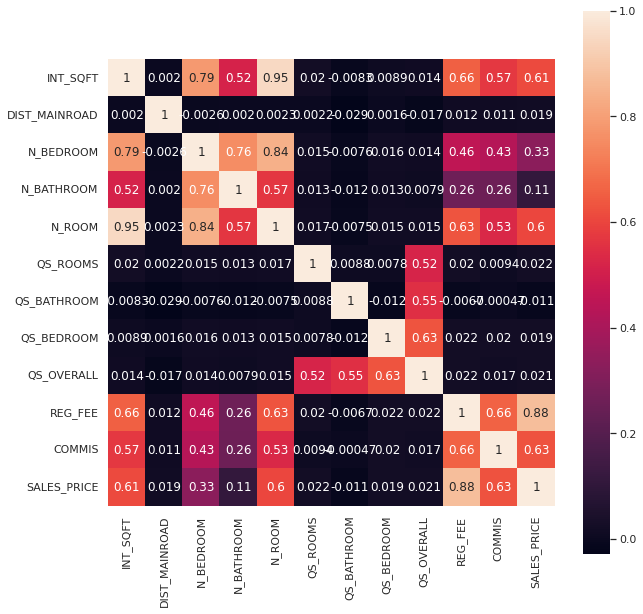

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1,annot=True ,square=True);

The heat map showed the correlation of each variable with another. The darker colour means no relationship between any two variables. And the light color means they have an almost strong relationship. Here we can infer that “SALES_PRICE” has a strong positive correlation with “INT_SQFT” whereas it has a low correlation with “QS_BATHROOM, QS_BEDROOM, DIST_MAINROAD”.



# j) target vs features plot distribution of data

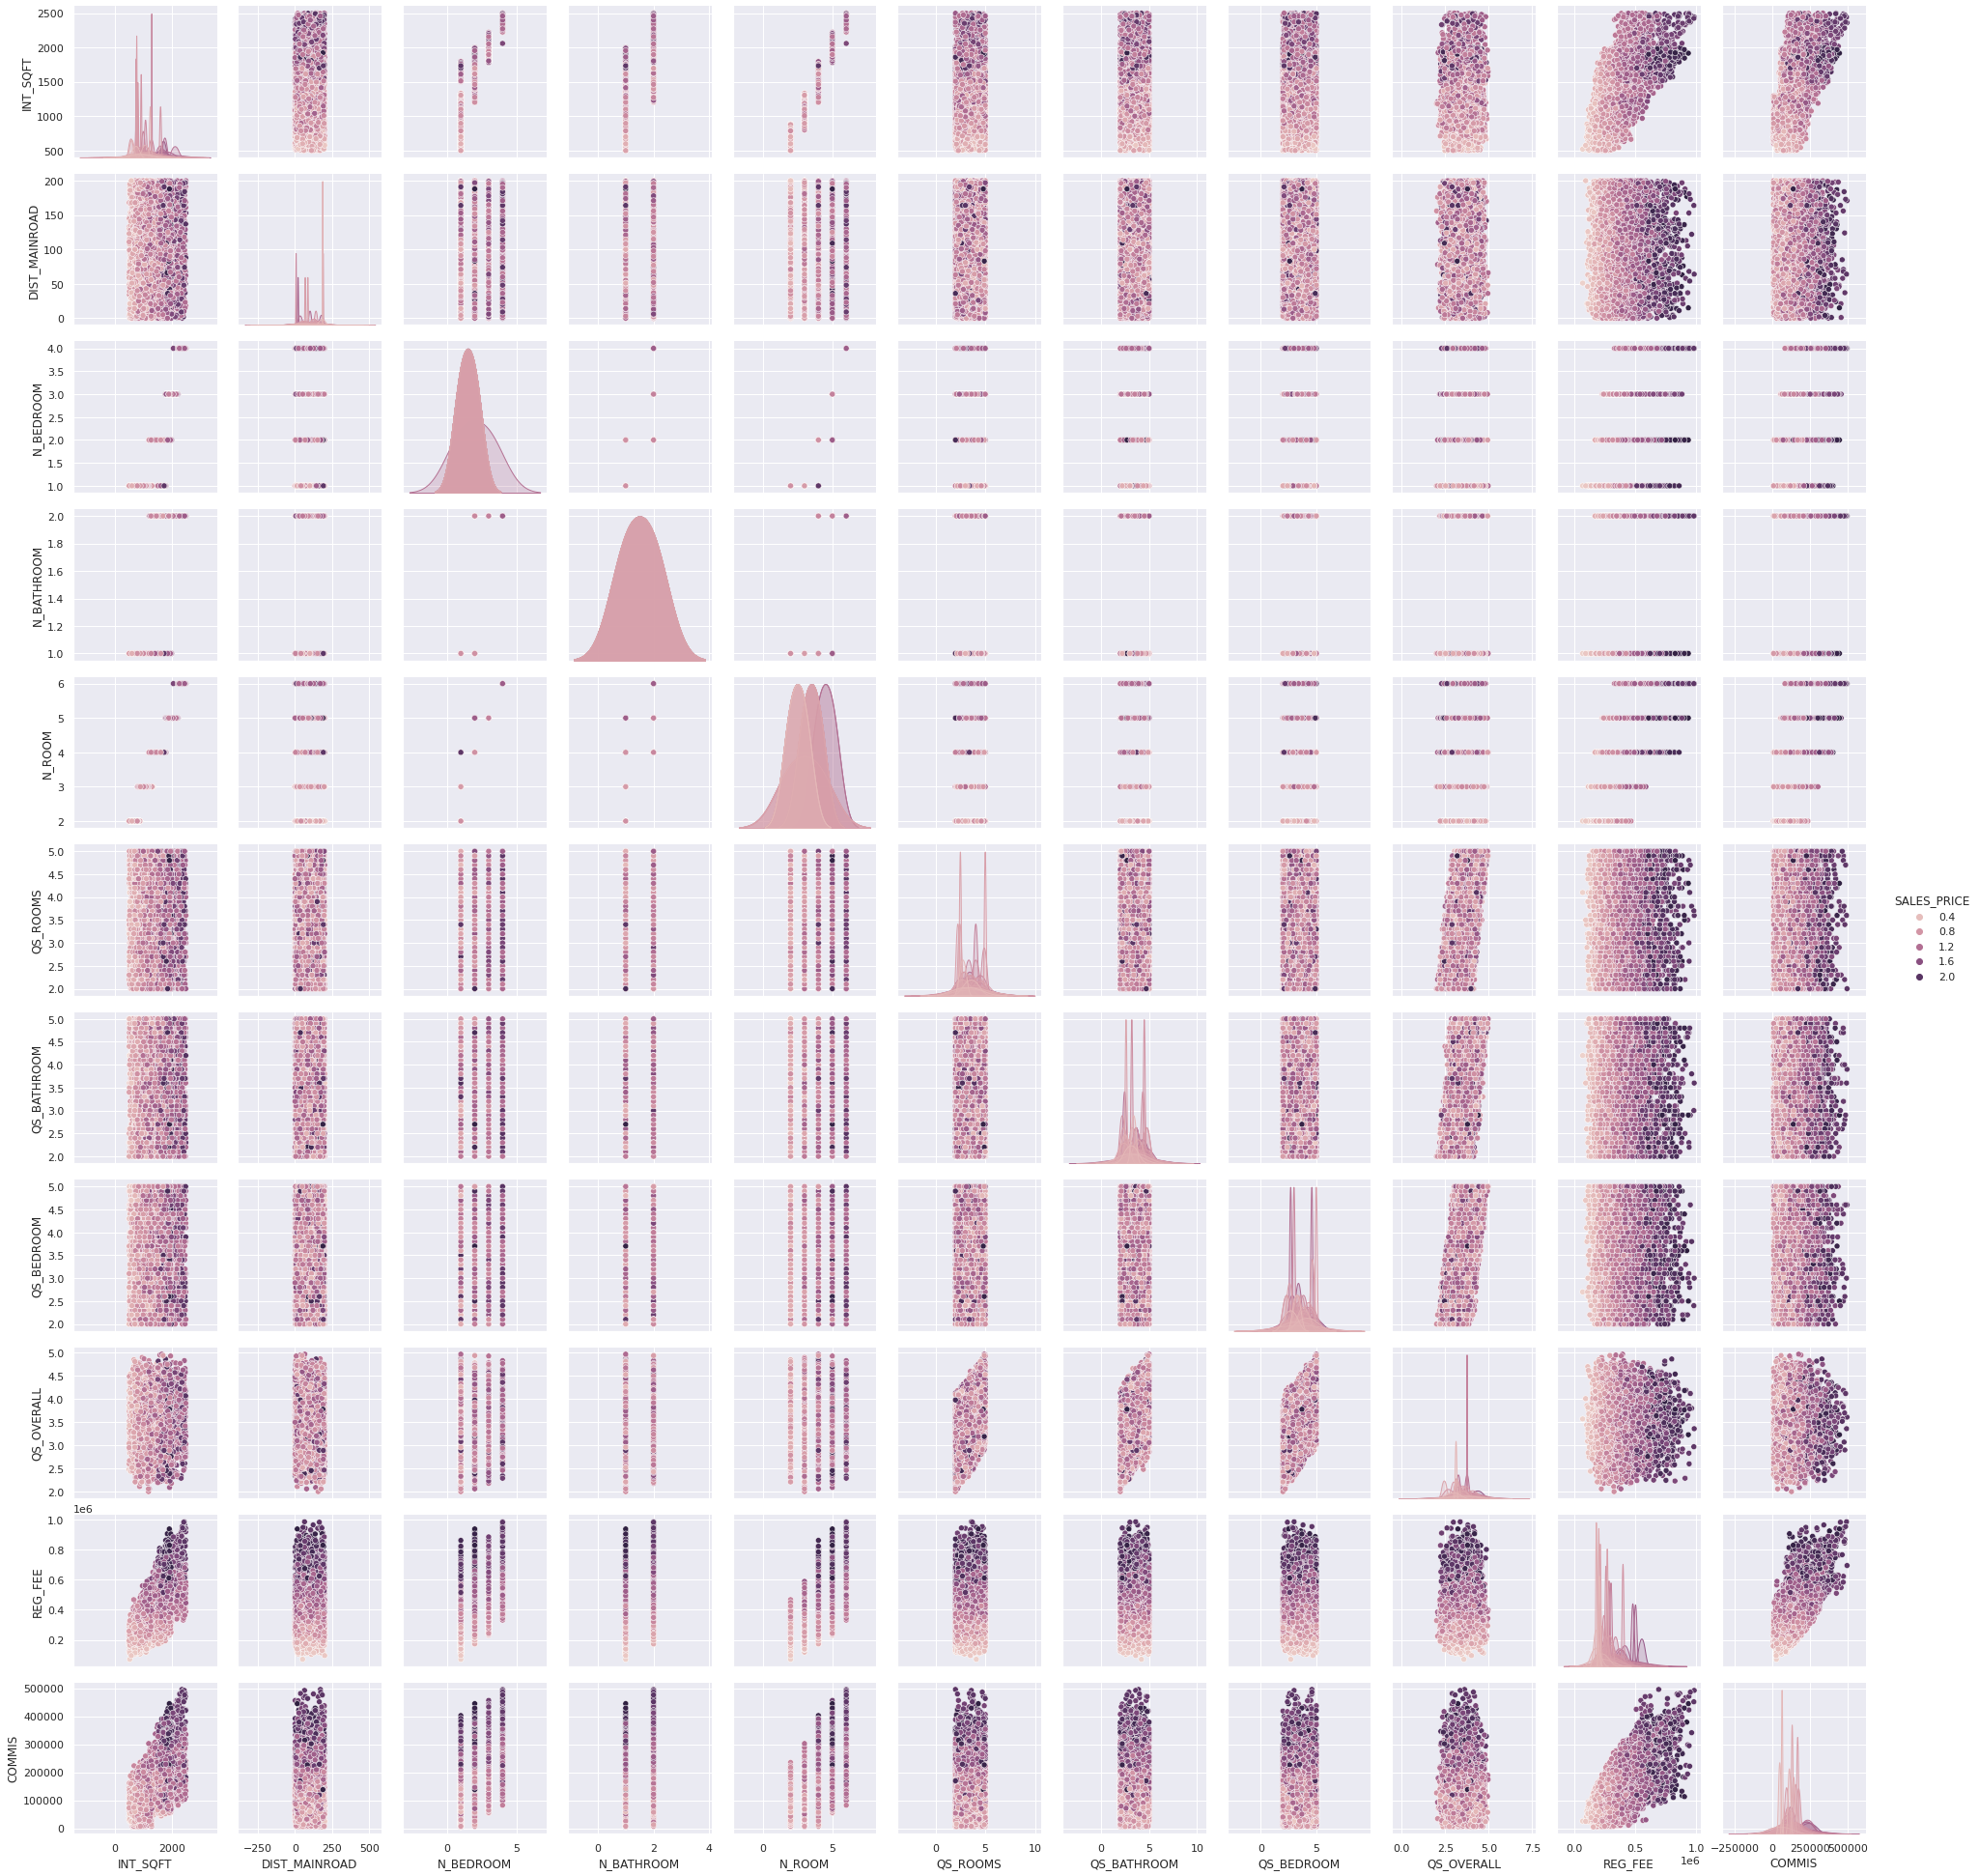

In [ ]:
sns.pairplot(df, hue='SALES_PRICE')

# h) skewness of the datset

In [ ]:

df.skew(axis = 0, skipna = True)



INT_SQFT         0.131238
DIST_MAINROAD    0.018144
N_BEDROOM        1.161882
N_BATHROOM       1.400359
N_ROOM           0.118801
QS_ROOMS        -0.018957
QS_BATHROOM      0.000310
QS_BEDROOM       0.017282
QS_OVERALL      -0.007263
REG_FEE          1.037755
COMMIS           0.951656
SALES_PRICE      0.773343
dtype: float64

# i) kurtosis of the dataset

In [ ]:
df.kurtosis(axis = 0, skipna = True)

INT_SQFT        -0.886379
DIST_MAINROAD   -1.165240
N_BEDROOM        0.734620
N_BATHROOM      -0.039006
N_ROOM          -0.530786
QS_ROOMS        -1.197535
QS_BATHROOM     -1.216251
QS_BEDROOM      -1.190165
QS_OVERALL      -0.489669
REG_FEE          1.126499
COMMIS           1.073363
SALES_PRICE      0.588129
dtype: float64

# 6: Univariate Analysis

# a) AREA

**AREA**

In [ ]:
df['AREA'].unique() #Typo Error

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
#Area name correction 

df['AREA'].nunique()#before it was 17
df["AREA"].replace("Chrompet","Chromepet",inplace=True)
df["AREA"].replace("Chrompt","Chromepet",inplace=True)
df["AREA"].replace("Chormpet","Chromepet",inplace=True)
df["AREA"].replace("Chrmpet","Chromepet",inplace=True)
df["AREA"].replace("Karapakam","Karapakkam",inplace=True)
df["AREA"].replace("KKNagar","KK Nagar",inplace=True)
df["AREA"].replace("Velchery","Velachery",inplace=True)
df["AREA"].replace("Ana Nagar","Anna Nagar",inplace=True)
df["AREA"].replace("Ann Nagar","Anna Nagar",inplace=True)
df["AREA"].replace("Adyr","Adyar",inplace=True)
df["AREA"].replace("TNagar","T Nagar",inplace=True)


In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df['AREA'].value_counts()

Chromepet     1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

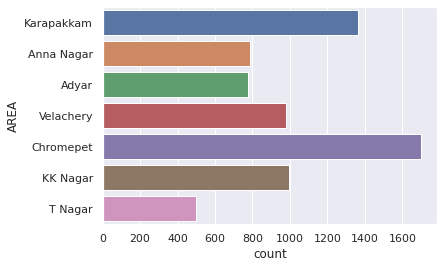

In [ ]:
# count plot on single categorical variable
sns.countplot(y ='AREA', data = df)
 
# Show the plot
plt.show()

From the above graph Chromepet has highest no of house and least in T Nagar.

# b) INT_SQFT

**INT_SQFT**

In [ ]:
df["INT_SQFT"].isnull().sum()#no missing values

0

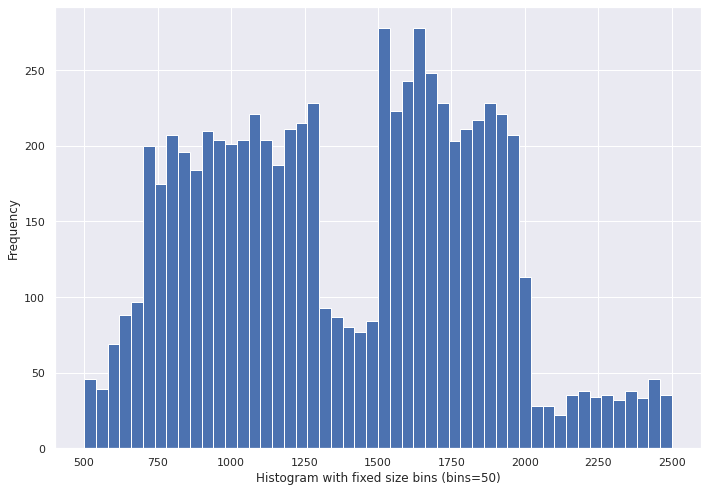

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["INT_SQFT"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics of INT_SQFT

Standard deviation	-457.4109025
Coefficient of variation (CV)	-0.3309600147
Kurtosis-	-0.8863792596
Mean	-1382.073006
Median Absolute Deviation (MAD)	-376
Skewnes-0.1312376308
Sum	-9825157
Variance-	209224.7337


**Quantile statistics of INT_SQFT**

Minimum	-500
5-th -percentile	702
Q1-	993
median-	1373
Q3	-1744
95-th percentile	-2084.6
Maximum-	2500
Range	-2000
Interquartile range (IQR)-	751


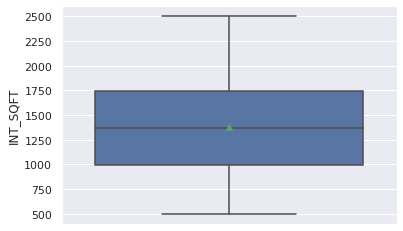

In [ ]:
sns.boxplot( y ='INT_SQFT',data=df,showmeans=True)

In the above graph there are no outlier.

# c) DATE_SALE

**DATE_SALE**

In [ ]:
df["DATE_SALE"].isnull().sum()#no missing values with correct data

0

In [ ]:
df["DATE_SALE"] = pd.to_datetime(df.DATE_SALE)
 
df["DATE_BUILD"]=pd.to_datetime(df.DATE_BUILD)
df["DATE_SALE"].dtypes


dtype('<M8[ns]')

# d) DATE_BUILD

**DATE_BUILD**

In [ ]:
df["DATE_BUILD"].isnull().sum()#no missing values

0

# e)DIST_MAINROAD

**DIST_MAINROAD**

In [ ]:

df["DIST_MAINROAD"].isnull().sum()#no missing values

0

**Quantile statistics**






Minimum-	0
5-th -percentile	10
Q1-	50
median-	99
Q3-	148
95-th percentile-	190
Maximum	-200
Range	-200
Interquartile range (IQR)-	98

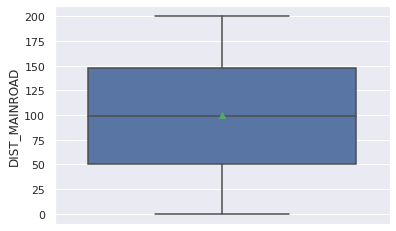

In [ ]:
sns.boxplot( y ='DIST_MAINROAD',data=df,showmeans=True)

In above graph there are no outlier.

**Descriptive statistics**

Standard deviation	-57.40310959
Coefficient of variation (CV)	-0.5763180465
Kurtosis-	-1.165240378
Mean-	99.60317907
Median Absolute Deviation (MAD)	-49
Skewness-	0.01814383556
Sum-	708079
Variance-	3295.11699
Monotonicity-	Not monotonic


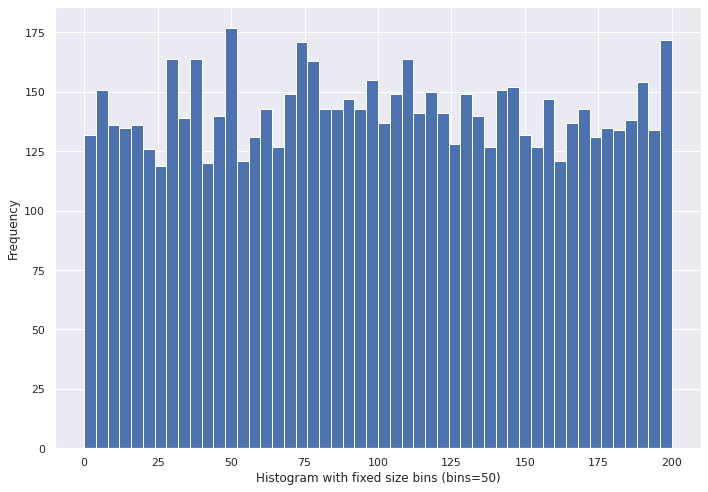

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["DIST_MAINROAD"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

# f) N_BEDROOM

**N_BEDRO**OM

In [ ]:
df["N_BEDROOM"].isnull().sum()#only one data is missing in N_BEDROOM

1

In [ ]:
df[df["N_BEDROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,2013-01-16,181,NaN,1.0,4,Partiall,No,1986-01-23,House,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [ ]:
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])

In [ ]:
df[df["N_BEDROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


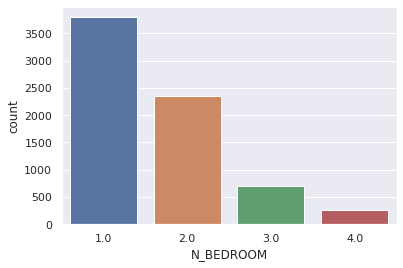

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="N_BEDROOM", data=df)

As we can see from the visualization 1 bedroom houses are most commonly sold followed by 2 bedroom.For a builder having this data , He can make a new building with more 1 and 2 bedroom’s to attract more buyers. So now we know that 1 and 2 bedroom’s are highest selling.1 bedroom count-3795,2b-2352,3b=707,4b=254.

# g) N_BATHROOM

**N_BATHROOM**

In [ ]:
df["N_BATHROOM"].isnull().sum()

5

In [ ]:
df[df["N_BATHROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,2010-03-22,39,1.0,NaN,4,Partial,No,1966-02-04,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,P01333,Chromepet,1016,2012-02-08,105,1.0,NaN,3,AbNormal,Yes,1980-10-08,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,P01332,Chromepet,916,2012-02-08,173,1.0,NaN,3,Normal Sale,Yes,1974-12-08,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,P01189,Chromepet,1035,2012-06-11,90,1.0,NaN,3,Partial,No,1981-11-14,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,P09189,Anna Nagar,1864,2007-05-03,184,2.0,NaN,5,Family,Yes,1997-07-03,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [ ]:
df["N_BATHROOM"]

0       1.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
7104    1.0
7105    2.0
7106    1.0
7107    1.0
7108    2.0
Name: N_BATHROOM, Length: 7109, dtype: float64

In [ ]:
df["N_BATHROOM"]=df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0]) 

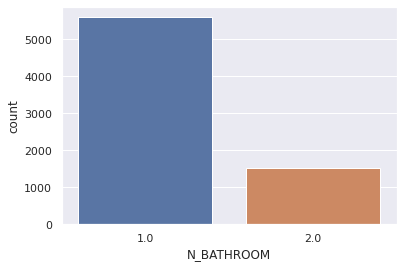

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="N_BATHROOM", data=df)

As we can see from the visualization 1-N_BATHROOM houses are most commonly sold followed by 2N_BATHROOM.For a builder having this data , He can make a new building with more to attract more buyers. So now we know that 1 N_BATHROOM’s are highest selling.NO of 1_N_BATHROOM-5589(73%)and 2_N_BATHROOM-1515(21%).




# h) N_ROOM

**N_ROOM**

In [ ]:

df["N_ROOM"].isnull().sum()#not null values present in N_ROOM


0

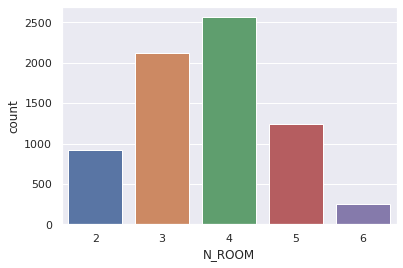

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="N_ROOM", data=df)

4[N_ROOM]-  2563	  36.1%,
3	[N_ROOM]- 2125	29.9%,
5	[N_ROOM]- 1246	17.5%,
2	[N_ROOM]- 921	 13.0%,
6[N_ROOM]-	254	 3.6%,
From the above graph no of 4 room has highest percentage and very low in 6 no of room.so we can recommand the builder to build more 4 no and 3 no room for more profit.

# i) SALE_COND

**SALE_COND**

In [ ]:
df["SALE_COND"].isnull().sum()#not null values"].isnull().sum()#not null values is present in SALE_COND


0

In [ ]:
#Typo Error in SALE_COND Columns
df["SALE_COND"].replace("Ab Normal","AbNormal",inplace=True)
df["SALE_COND"].replace("Partiall","Partial",inplace=True)
df["SALE_COND"].replace("PartiaLl","Partial",inplace=True)
df["SALE_COND"].replace("Adj Land","AdjLand",inplace=True)


In [ ]:
df["SALE_COND"].unique()#after correction 

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

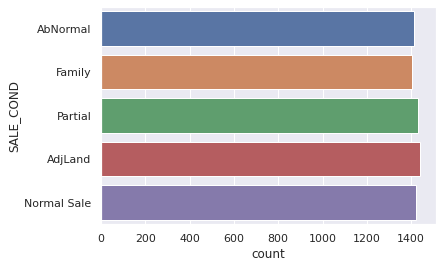

In [ ]:
# count plot on single categorical variable
sns.countplot(y ='SALE_COND', data = df)
 
# Show the plot
plt.show()

From the above graph sale_cond are similar.

#  j) PARK_FACIL

**PARK_FACIL**

In [ ]:
df["PARK_FACIL"].unique().sum()#Typo Error


'YesNoNoo'

In [ ]:
df["PARK_FACIL"].replace("Noo","No",inplace=True)

In [ ]:
df["PARK_FACIL"].unique()#after correction of data

array(['Yes', 'No'], dtype=object)

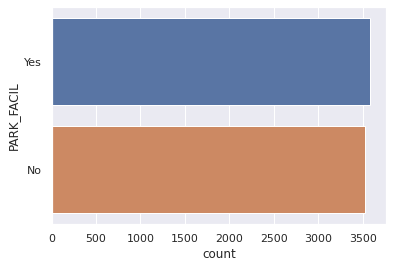

In [ ]:
# count plot on single categorical variable
sns.countplot(y ='PARK_FACIL', data = df)
 
# Show the plot
plt.show()

There is very less diffrance in yes and no.

#  k) DATE_BUILD

**DATE_BUILD**

In [ ]:
df["DATE_BUILD"].count()

7109

# l) BUILDTYPE

**BUILDTYPE**

In [ ]:
df["BUILDTYPE"].isnull().sum()

0

In [ ]:
df["BUILDTYPE"].unique()# Typo Error


array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
#correction of words
df["BUILDTYPE"].replace("Comercial","Commercial",inplace=True)
df["BUILDTYPE"].replace("Other","Others",inplace=True)

In [ ]:
#after correction 
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

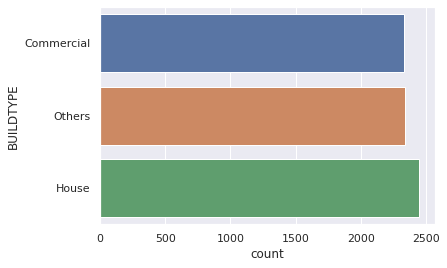

In [ ]:
# count plot on single categorical variable
sns.countplot(y ='BUILDTYPE', data = df)
 
# Show the plot
plt.show()

From  the above graph "House" is high in percentace (34%)."other" and "commercial" are same percentace.

# m) UTILITY_AVAIL

**UTILITY_AVAIL**

In [ ]:
#Typo Error
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
#corretion of words
df["UTILITY_AVAIL"].replace("AllPub","All Pub",inplace=True)
df["UTILITY_AVAIL"].replace('NoSewr ','NoSeWa',inplace=True)

In [ ]:
#after correction 
df["UTILITY_AVAIL"].unique()

array(['All Pub', 'ELO', 'NoSeWa'], dtype=object)

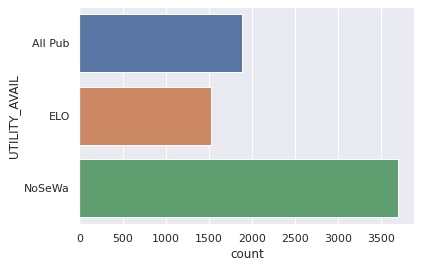

In [ ]:
# count plot on single categorical variable
sns.countplot(y ='UTILITY_AVAIL', data = df)
 
# Show the plot
plt.show()

"NOSEWA" has high count as comapre to "ELO" and "ALLPUB".

# n) STREET

**STREET**

In [ ]:
#Typo Error
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
#Typo Error
df["STREET"].replace('Pavd','Paved',inplace=True)
df["STREET"].replace('NoAccess','No Access',inplace=True)

In [ ]:
#after correction 
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

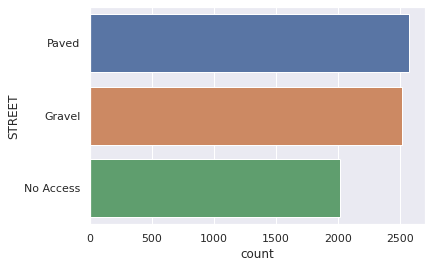

In [ ]:
# count plot on single categorical variable
sns.countplot(y ='STREET', data = df)
 
# Show the plot
plt.show()

from the above graph "PAVED" has high count and less in "NO ACCESS"

# o) MZZONE

**MZZONE**

In [ ]:
df["MZZONE"].unique()#no need to required any change

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

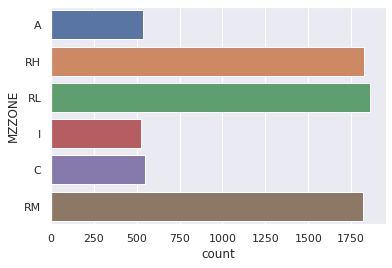

In [ ]:
# count plot on single categorical variable
sns.countplot(y ='MZZONE', data = df)
 
# Show the plot
plt.show()

RH,RL,RM has almost simlier and has high count .in other way A,C,I has similer but low count.

# p) QS_ROOMS

**QS_ROOMS**

In [ ]:
df["QS_ROOMS"].unique()#no need to requires any changes

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

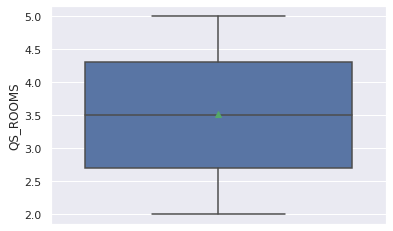

In [ ]:
sns.boxplot( y ='QS_ROOMS',data=df,showmeans=True)

In the above figure there are no outlier is present.

**Quantile statistics**

Minimum	-2
5-th percentile	-2.1
Q1-	2.7
median	-3.5
Q3	-4.3
95-th percentile-	4.9
Maximum	-5
Range	-3
Interquartile range (IQR)	-1.6

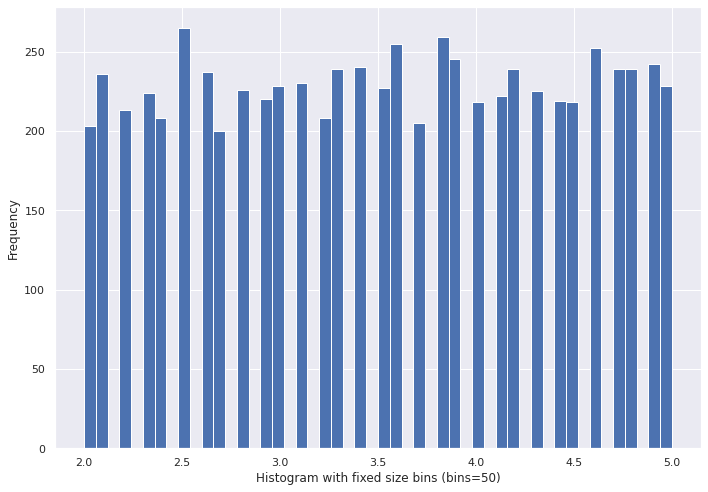

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["QS_ROOMS"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

# q) QS_BATHROOM

**QS_BATHROOM**

In [ ]:
df["QS_BATHROOM"].unique()#no need  to requies any chnanges

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

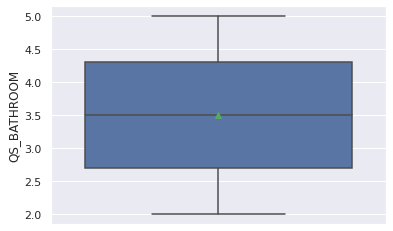

In [ ]:
sns.boxplot( y ='QS_BATHROOM',data=df,showmeans=True)

**Quantile statistics**

Minimum-	2
5-th- percentile	2.1
Q1-	2.7
median-	3.5
Q3-	4.3
95-th percentile-	4.9
Maximum	-5
Range-	3
Interquartile range (IQR)	-1.6

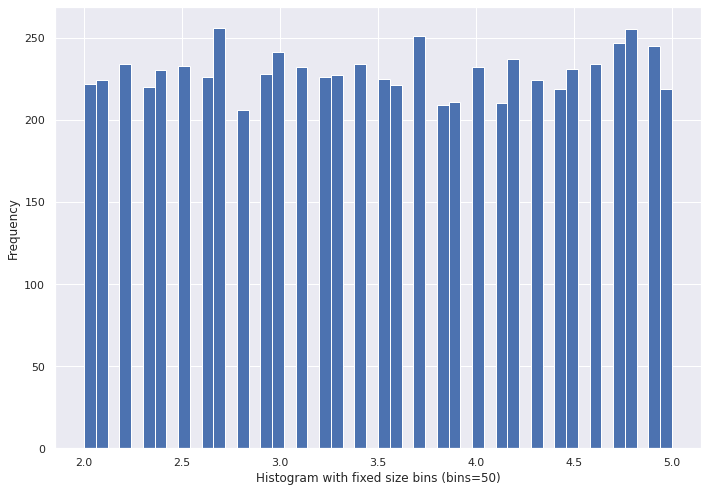

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["QS_BATHROOM"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

# r) QS_BEDROOM

**QS_BEDROOM**

In [ ]:
df['QS_BEDROOM'].unique()#no need to requres any chnages

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

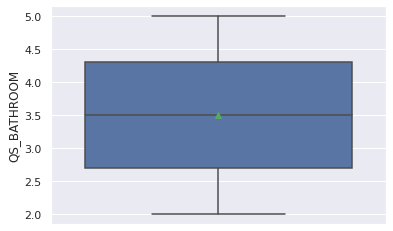

In [ ]:
sns.boxplot( y ='QS_BATHROOM',data=df,showmeans=True)

From the above graph no outlier is present

Minimum	-2
5-th percentile-	2.1
Q1	-02.7
median	-3.5
Q3	-4.3
95-th percentile-	4.9
Maximum-	5
Range-	3
Interquartile range (IQR)	-1.6

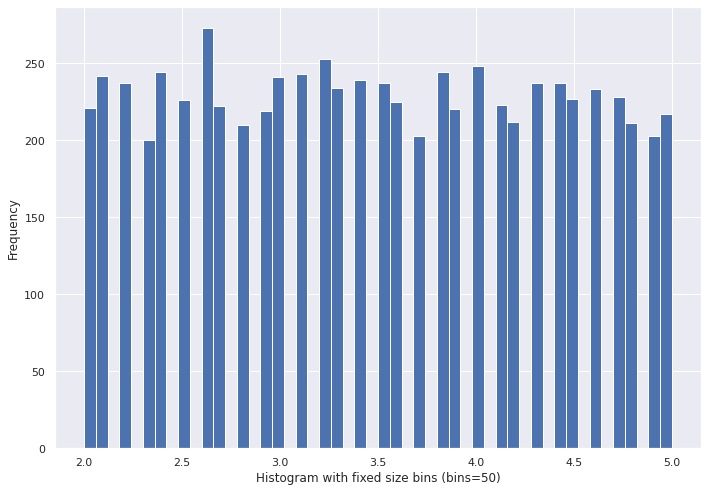

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["QS_BEDROOM"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

# s) QS_OVERALL

**QS_OVERALL**

In [ ]:
df['QS_OVERALL'].isnull().sum()#48 data are missing

48

In [ ]:
df['QS_OVERALL'].value_counts

<bound method IndexOpsMixin.value_counts of 0       4.330
1       3.765
2       3.090
3       4.010
4       3.290
        ...  
7104    2.520
7105    3.920
7106    3.840
7107    4.160
7108    3.640
Name: QS_OVERALL, Length: 7109, dtype: float64>

In [ ]:
df.QS_OVERALL.fillna(df.QS_OVERALL.mean(),inplace=True)#fill the mean values into the data

In [ ]:
df['QS_OVERALL'].isnull().sum()#after filling the mean values no missing values are present

0

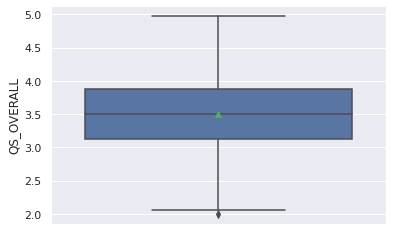

In [ ]:
sns.boxplot( y ='QS_OVERALL',data=df,showmeans=True)

**Quantile statistics**

Minimum	-2
5-th percentile	-2.63
Q1	-3.13
median-	3.5
Q3-	3.89
95-th percentile-	4.37
Maximum	-4.97
Range-	2.97
Interquartile range (IQR)-	0.76

From the above graph some outlier is present

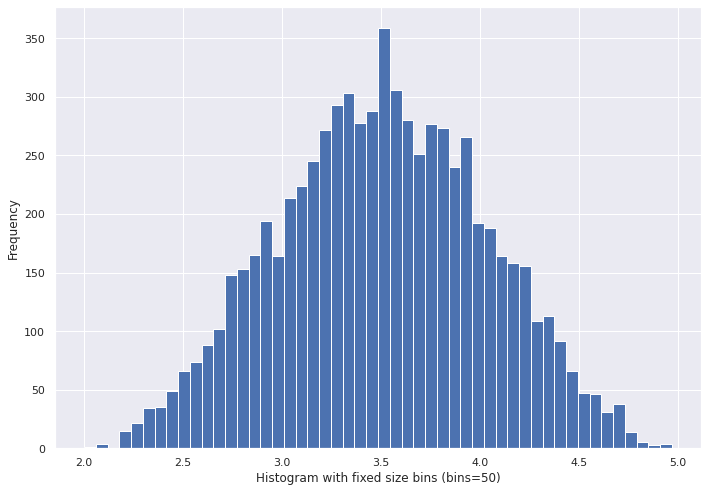

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["QS_OVERALL"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

I can use mean value to replace the missing values because the data distribution is symmetric.

**REG_FEE**

# t) REG_FEE

In [ ]:
df['REG_FEE'].value_counts#no missing values 

<bound method IndexOpsMixin.value_counts of 0       380000
1       760122
2       421094
3       356321
4       237000
         ...  
7104    208767
7105    346191
7106    317354
7107    425350
7108    349177
Name: REG_FEE, Length: 7109, dtype: int64>

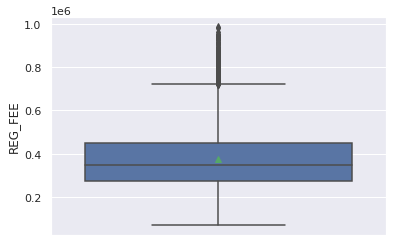

In [ ]:
sns.boxplot( y ='REG_FEE',data=df,showmeans=True)

Minimum-	71177
5-th percentile	-197984.6
Q1-	272406
median	-349486
Q3-	451562
95-th percentile-	669167.4
Maximum	-983922
Range-	912745
Interquartile range (IQR)-	179156

From the above graph outlier is present.

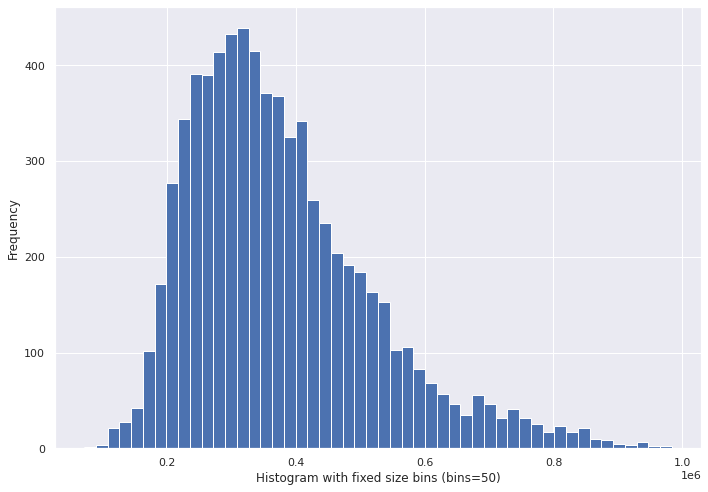

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["REG_FEE"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

from the above graph reg fee is Skewned-(1.037754561) towads left side.data are not distributed properly.

**COMMIS**

# u) COMMIS

In [ ]:
df["COMMIS"].isnull().sum()#no missing values in COMMIS

0

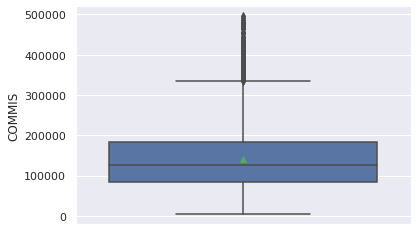

In [ ]:
sns.boxplot( y ='COMMIS',data=df,showmeans=True)

Minimum-	5055
5-th percentile	-35990.6
Q1-	84219
median-	127628
Q3-	184506
95-th percentile-	292538
Maximum	-495405
Range	-490350
Interquartile range (IQR)-	100287

From the above graph outlier is present.

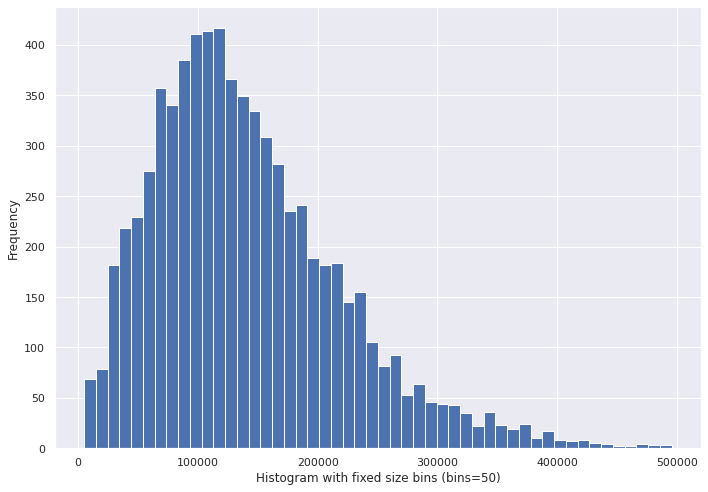

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["COMMIS"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

# v) SALES_PRICE

from the above graph data are skewed towards right Skewness	0.9516562165

**SALES_PRICE**

In [ ]:
df["SALES_PRICE"].isnull().sum()#no missing values in SALES_PRICE

0

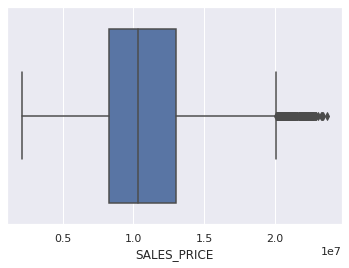

In [ ]:
import seaborn as sns
sns.boxplot(df['SALES_PRICE'])

**Quantile statistics**

Minimum	-2156875
5-th percentile	-5630100
Q1-	8272100
median-	10335050
Q3-	12993900
95-th percentile-	18790428
Maximum-	23667340
Range-	21510465
Interquartile range (IQR)	-4721800

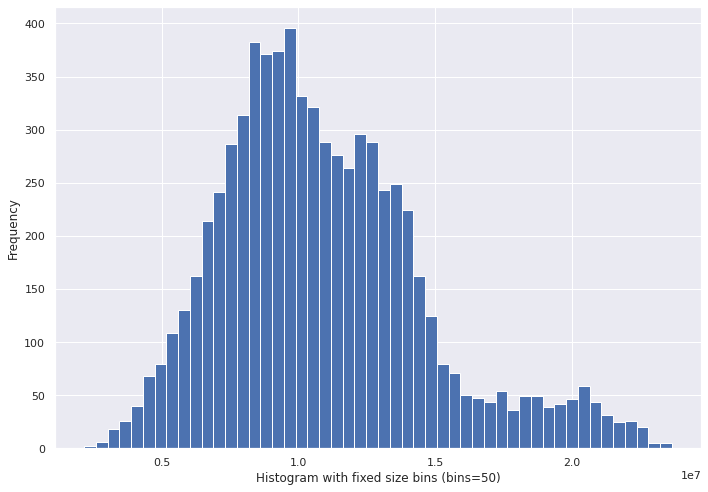

In [ ]:
np.random.seed(23685752)
N_points = 10000
n_bins = 50
x = df["SALES_PRICE"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
# Show plot
plt.xlabel('Histogram with fixed size bins (bins=50)')
plt.ylabel('Frequency')
plt.show()

From the above graph outlier is present

In [ ]:
Q1=np.percentile(df['SALES_PRICE'],25)
Q3=np.percentile(df['SALES_PRICE'],75)
IQR=Q3-Q1
#print(Q3)
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)
print(lower_range,upper_range)   

1189400.0 20076600.0


In [ ]:
df['SALES_PRICE']=np.where(df['SALES_PRICE']>upper_range,upper_range,df['SALES_PRICE'])
df['SALES_PRICE']=np.where(df['SALES_PRICE']<lower_range,lower_range,df['SALES_PRICE'])

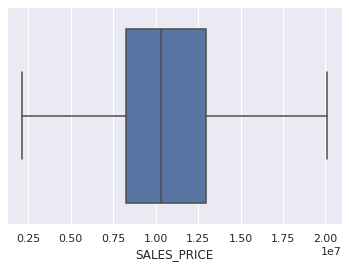

In [ ]:
#After removing the outlier 
sns.boxplot(df['SALES_PRICE'])

**7 : Univeriate analysis:**



## 7 : Bivariate analysis:

# a)AREA vs SALES_PRICE

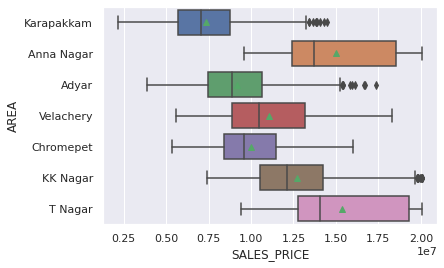

In [ ]:
sns.boxplot( y ='AREA',x='SALES_PRICE',data=df,showmeans=True)

In [ ]:
df.groupby("AREA")["SALES_PRICE"].aggregate([np.mean]).sort_values(by='mean',ascending=False)

,mean
AREA,
T Nagar,1.536569e+07
Anna Nagar,1.498409e+07
KK Nagar,1.269576e+07
Velachery,1.104735e+07
Chromepet,1.001381e+07
Adyar,9.185668e+06
Karapakkam,7.340100e+06


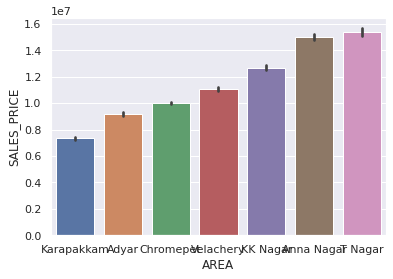

In [ ]:
sns.barplot(x="AREA",y="SALES_PRICE",data=df,order=df.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])

From the above graph T nagar has high sales price and low in karapakkam.

**Now we will see areawise sales price distribution on histogra**

In [ ]:
df['AREA'].value_counts()

Chromepet     1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

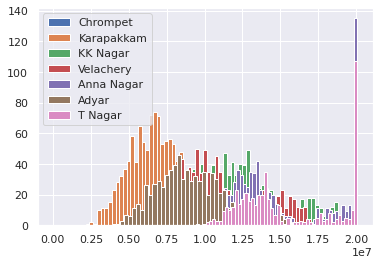

In [ ]:

figure, axis = plt.subplots()
arealist = ['Chrompet','Karapakkam','KK Nagar','Velachery','Anna Nagar','Adyar','T Nagar']

for i in arealist:
    tem = df['SALES_PRICE'].loc[df['AREA'] == i]
    axis.hist(tem,label = i,bins = 50)
    plt.legend()

# b) INT_SQFT vs SALES_PRICE

**INT_SQFT vs SALES_PRICE**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


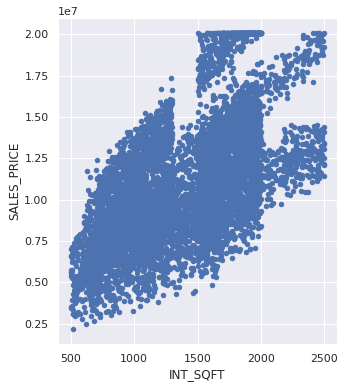

In [ ]:
df.plot.scatter(x="INT_SQFT",y="SALES_PRICE",figsize=(5,6))

From the above  graph sales price and int sqft has linear positive realtions 

# c) N_BEDROOM vs SALES_PRICE

**N_BEDROOM vs SALES_PRICE**

****

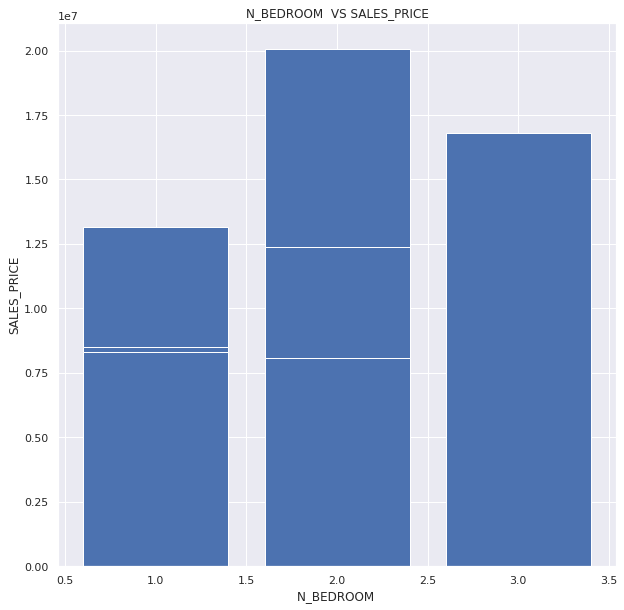

In [ ]:
N_BEDROOM = df["N_BEDROOM"]
price = df['SALES_PRICE']
 
# Figure Size
fig = plt.figure(figsize =(10, 10))
 
# Horizontal Bar Plot
plt.bar(N_BEDROOM[0:10], price[0:10])
plt.title('N_BEDROOM  VS SALES_PRICE')
plt.xlabel('N_BEDROOM ')
plt.ylabel('SALES_PRICE')
 
# Show Plot
plt.show()

# d)N_BATHROOM vs SALES_PRICE

**N_BATHROOM vs SALES_PRICE**

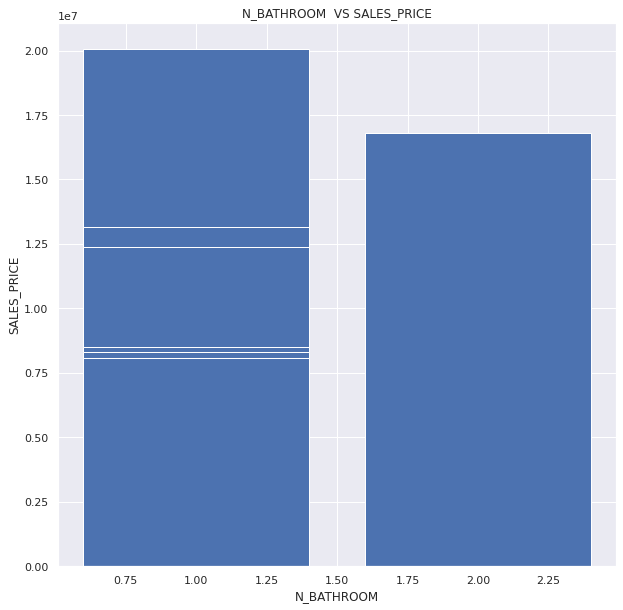

In [ ]:
N_BATHROOM = df["N_BATHROOM"]
price = df['SALES_PRICE']
 
# Figure Size
fig = plt.figure(figsize =(10, 10))
 
# Horizontal Bar Plot
plt.bar(N_BATHROOM[0:10], price[0:10])
plt.title('N_BATHROOM  VS SALES_PRICE')
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')
 
# Show Plot
plt.show()

# e) N_ROOM vs SALES_PRICE

N_ROOM vs SALES_PRICE

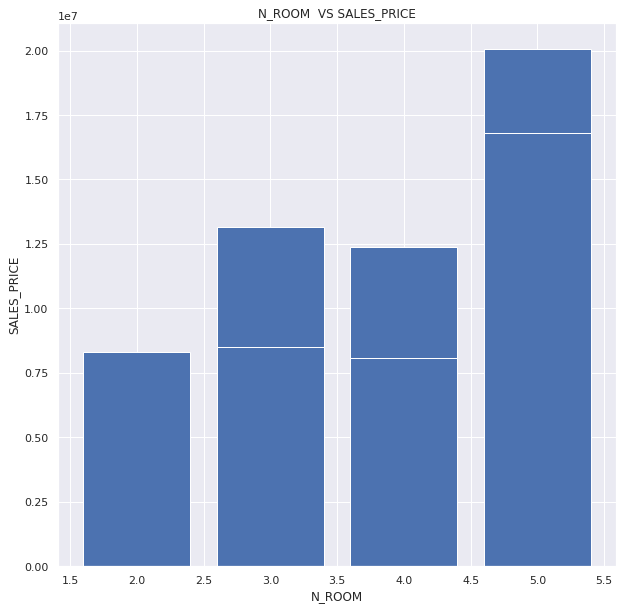

In [ ]:
N_ROOM = df["N_ROOM"]
price = df['SALES_PRICE']
 
# Figure Size
fig = plt.figure(figsize =(10, 10))
 
# Horizontal Bar Plot
plt.bar(N_ROOM[0:10], price[0:10])
plt.title('N_ROOM  VS SALES_PRICE')
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')
 
# Show Plot
plt.show()

# f) SALE_COND vs SALES_PRICE

**SALE_COND  vs SALES_PRICE**

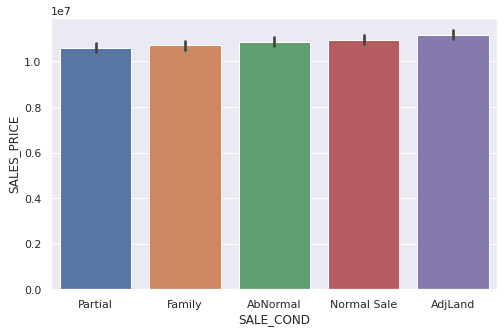

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=df,order=df.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])

#g) PARK_FACIL VS SALES_PRICE

**PARK_FACIL VS SALES_PRICE**

Text(0.5, 1.0, 'PARK_FACIL VS SALES_PRICE')

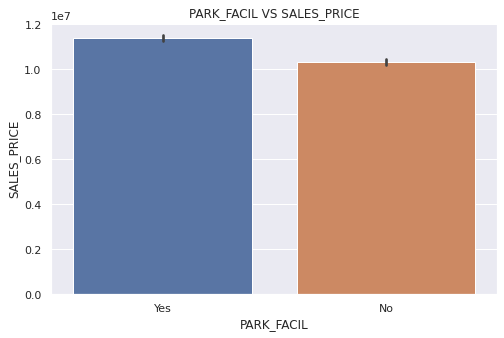

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.title("PARK_FACIL VS SALES_PRICE")

# h) UTILITY_AVAIL VS SALES_PRICE

**UTILITY_AVAIL VS SALES_PRICE**

Text(0.5, 1.0, 'UTILITY_AVAIL VS SALES_PRICE')

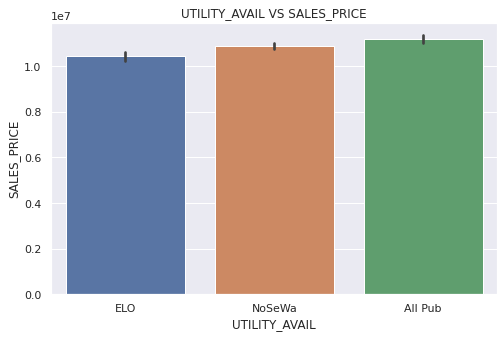

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=df,order=df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])
plt.title("UTILITY_AVAIL VS SALES_PRICE")

# i) STREET VS SALES_PRICE

**STREET VS SALES_PRICE**

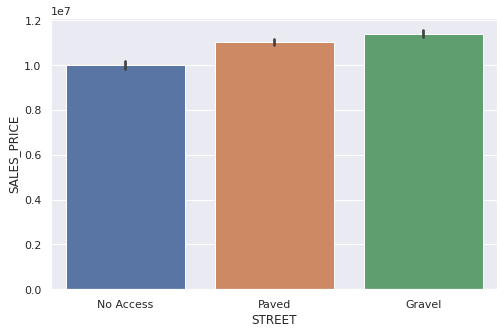

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="STREET",y="SALES_PRICE",data=df,order=df.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])

# j) MZZONE VS SALES_PRICE

**MZZONE VS SALES_PRICE**

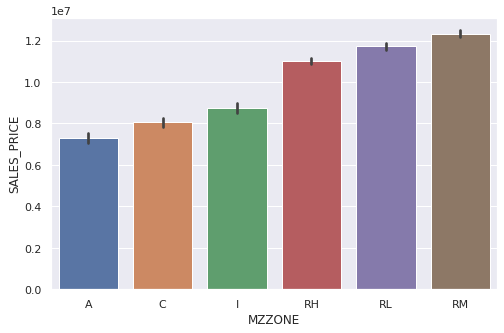

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="MZZONE",y="SALES_PRICE",data=df,order=df.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])

# k) DIST_MAINROAD vs SALES_PRICE

**DIST_MAINROAD vs SALES_PRICE**

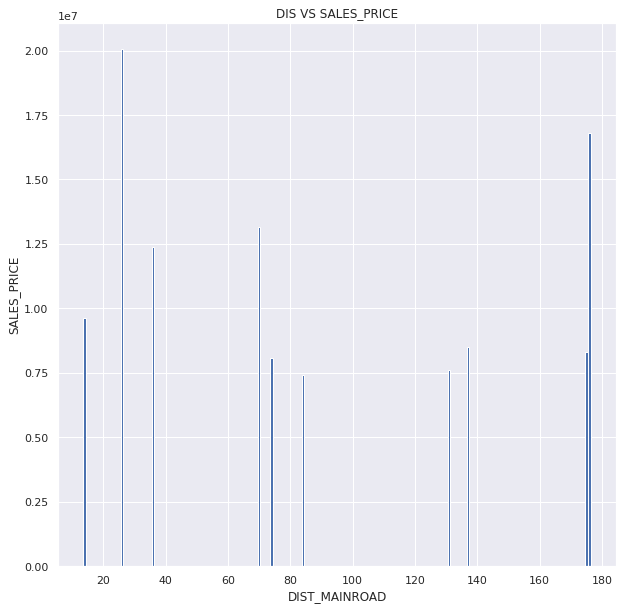

In [ ]:
distance = df['DIST_MAINROAD'].head(12)
price = df['SALES_PRICE'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 10))
 
# Horizontal Bar Plot
plt.bar(distance[0:10], price[0:10])
plt.title('DIS VS SALES_PRICE')
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
 
# Show Plot
plt.show()

From the above graph between SALES_PRICE and DIST_MAINROAD.it shows the distace between the range from 20 to 40 from the mainroad has high price.

# l) QS_ROOMS  VS SALES_PRICE

 ** QS_ROOMS  VS SALES_PRICE**

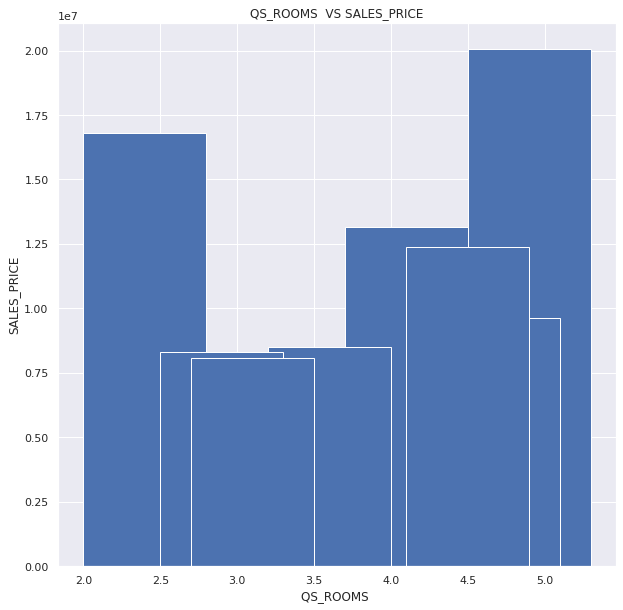

In [ ]:
QS_ROOMS = df["QS_ROOMS"]
price = df['SALES_PRICE']
 
# Figure Size
fig = plt.figure(figsize =(10, 10))
 
# Horizontal Bar Plot
plt.bar(QS_ROOMS[0:10], price[0:10])
plt.title('QS_ROOMS  VS SALES_PRICE')
plt.xlabel('QS_ROOMS ')
plt.ylabel('SALES_PRICE')
 
# Show Plot
plt.show()

# m) QS_BATHROOM VS SALES_PRICE

**QS_BATHROOM VS SALES_PRICE**

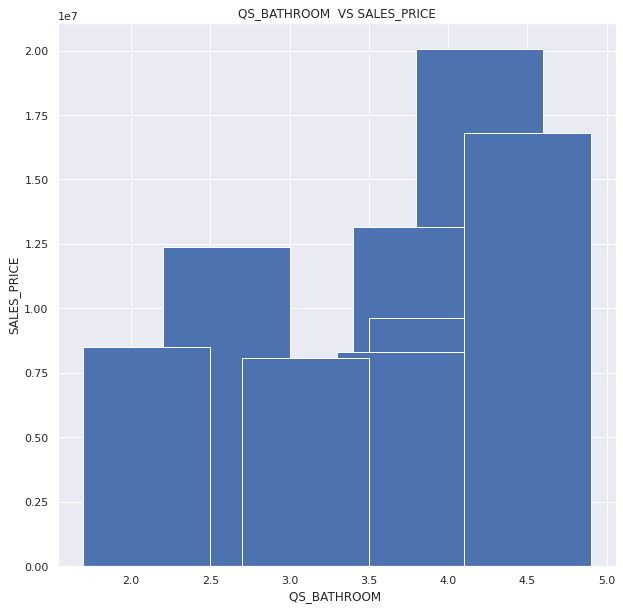

In [ ]:
QS_ROOMS = df["QS_BATHROOM"]
price = df['SALES_PRICE']
 
# Figure Size
fig = plt.figure(figsize =(10, 10))
 
# Horizontal Bar Plot
plt.bar(QS_ROOMS[0:10], price[0:10])
plt.title('QS_BATHROOM  VS SALES_PRICE')
plt.xlabel('QS_BATHROOM ')
plt.ylabel('SALES_PRICE')
 
# Show Plot
plt.show()

# n) QS_BEDROOM VS SALES_PRICE

 QS_BEDROOM VS SALES_PRICE

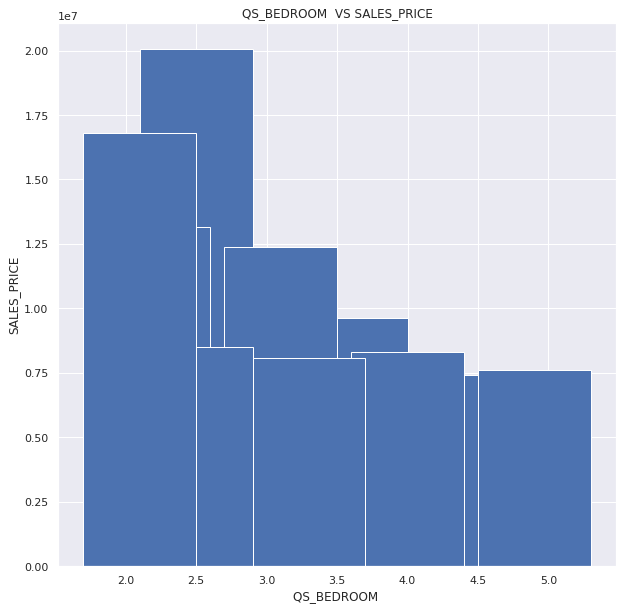

In [ ]:
QS_ROOMS = df["QS_BEDROOM"]
price = df['SALES_PRICE']
 
# Figure Size
fig = plt.figure(figsize =(10, 10))
 
# Horizontal Bar Plot
plt.bar(QS_ROOMS[0:10], price[0:10])
plt.title('QS_BEDROOM  VS SALES_PRICE')
plt.xlabel('QS_BEDROOM ')
plt.ylabel('SALES_PRICE')
 
# Show Plot
plt.show()

# o)QS_OVERALL VS SALES_PRICE

** QS_OVERALL VS SALES_PRICE**

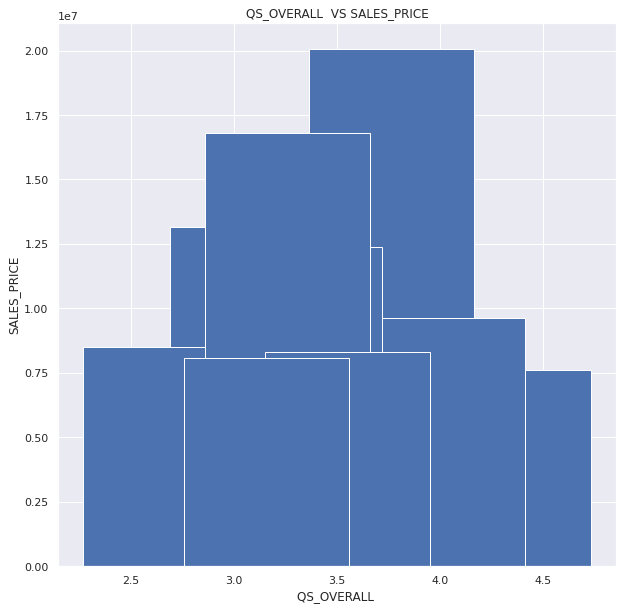

In [ ]:
QS_ROOMS = df["QS_OVERALL"]
price = df['SALES_PRICE']
 
# Figure Size
fig = plt.figure(figsize =(10, 10))
 
# Horizontal Bar Plot
plt.bar(QS_ROOMS[0:10], price[0:10])
plt.title('QS_OVERALL  VS SALES_PRICE')
plt.xlabel('QS_OVERALL ')
plt.ylabel('SALES_PRICE')
 
# Show Plot
plt.show()

# p) REG_FEE VS SALES_PRICE

**REG_FEE VS SALES_PRICE**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


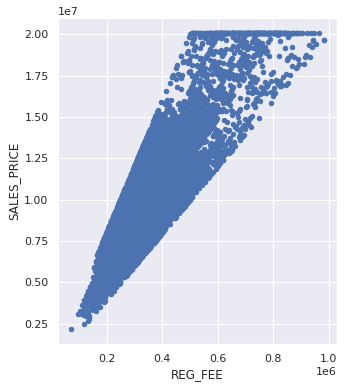

In [ ]:

df.plot.scatter(x="REG_FEE",y="SALES_PRICE",figsize=(5,6))

# q) COMMIS VS SALES_PRICE

**COMMIS VS SALES_PRICE**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


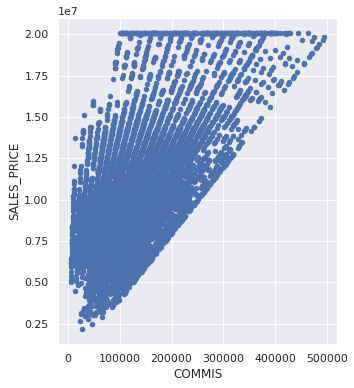

In [ ]:
df.plot.scatter(x="COMMIS",y="SALES_PRICE",figsize=(5,6))

In above graph it can be seen that there is linear relatinship between SALES_PRICE and COMMMIS

In [ ]:
df[['SALES_PRICE','COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.627828
COMMIS,0.627828,1.000000


Correlation is ~0.63 enough to show positive correlation between the two vairables

# 8) Multivariate analysis

# a) INT_SQFT,SALES_PRICE,BUILDTYPE

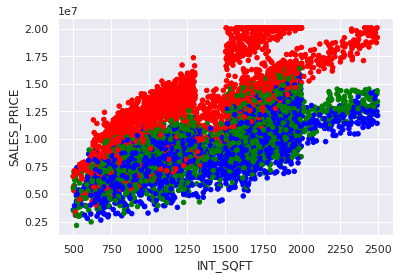

In [ ]:
colors = {'Commercial':'red','House':'blue','Others':'green'}
df.plot.scatter('INT_SQFT','SALES_PRICE',c=df['BUILDTYPE'].apply(lambda x: colors[x]))

There is linear relation in Interior Sqft and Sales Price
Commercials have highest price than 'House' and 'Others' type of category
In univariate analysis we found that houses in between 750 and 1250 sqft or 1500 to 2000 sqft were most common, but here we can see they also have high price

# b) SALES PRICE RELATIONSHIP WITH NO OF BEDROOMS AND NO OF BATHROOMS

In [ ]:
df.pivot_table(values='SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12131870.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


A clear trend is visible
Houses with one bedroom have exactly 1 bathroom
Houses with 3 to 4 bedrooms have exactly 2 bathrooms

# c) QS_ROOMS, QS_BATHROOM, QS_BEDROOM , 'QS_OVERALL

In [ ]:
df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


We can see that the QS_OVERALL is nearly equal to (QS_ROOMS+QS_BATHROOM+QS_BEDROOM)/3

In [ ]:
df['QS_OVERALL'].isnull().sum()

0

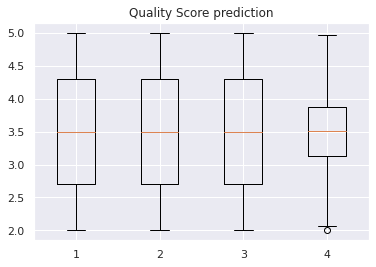

In [ ]:
ax = plt.figure().add_subplot(111)
ax.set_title('Quality Score prediction')
#creating box plot
bp = ax.boxplot([df['QS_BEDROOM'],df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_OVERALL']])

# d) TYPE AND SBUILDALES PRICE

In [ ]:
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200.0
House          8985370.0
Others         9637260.0
Name: SALES_PRICE, dtype: float64

As in above figure we can see commercial houses in Anna Nagar have relatively higher price

**5. EFFECT OF PARKING FACILITY ON SALES PRICE BASED ON BUILD TYPE**

In [ ]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985.0
            Yes           13920600.0
House       No             8514140.0
            Yes            9468150.0
Others      No             9104645.0
            Yes           10039405.0
Name: SALES_PRICE, dtype: float64

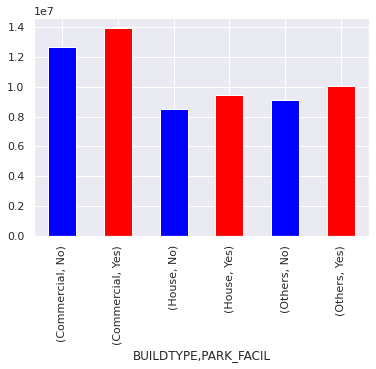

In [ ]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
color = {'Yes':'blue','No':'red'}
temp.plot(kind = 'bar', stacked = True, color = df['PARK_FACIL'].apply(lambda x: color[x]))

It's clearly visible that parking facility in any buildtype i.e commercial, house and others increases sales price

In [ ]:
df1 = df.copy()
df1['price_per_sqft'] = df1['SALES_PRICE']/df1['INT_SQFT']
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,price_per_sqft
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000.0,7569.721116
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,20076600.0,10109.063444
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200.0,14476.567657
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290.0,5191.530997
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250.0,6040.986949


In [ ]:
df1.groupby("AREA")["price_per_sqft"].aggregate([np.mean]).sort_values(by='mean',ascending=False)

,mean
AREA,
Chromepet,10116.880041
Adyar,9783.934955
T Nagar,8764.273020
Anna Nagar,8569.376186
Karapakkam,6994.312104
KK Nagar,6766.971053
Velachery,6354.402746


from above data Chrompet has high price sqaureft area and less in velachery.

In [ ]:
df1["year_BUILD"]=pd.DatetimeIndex(df['DATE_BUILD']).year
 
df1['year_SALE'] = pd.DatetimeIndex(df['DATE_SALE']).year

In [ ]:
df1["Age"]=df1["year_SALE"]-df1["year_BUILD"]
df1["Age"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: Age, Length: 7109, dtype: int64

In [ ]:

df1["2021"]=pd.Series([2021 for x in range(len(df1.index))])

In [ ]:
df1["inflation"]=df1["2021"]-df1["year_SALE"]

In [ ]:
df1.reset_index(inplace = True)

because ofrecession  will effect the peice of the house because of recession(in my case i have taken 5% )
 

In [ ]:
inflated_price=[]
for i in range(7103):
   amount = df1["SALES_PRICE"][i] * (pow((1 + 5 / 100),df1["inflation"][i]))
   inflated_price.append(amount)

In [ ]:
inflated_price

[12379599.163508559,
 41737809.48677029,
 20414238.25970449,
 16471064.01707396,
 13300560.9146014,
 17440657.96371856,
 16807223.562005173,
 34926513.14615585,
 13534436.587054962,
 16805327.77749871,
 31055029.144047026,
 16970357.399701104,
 15007150.353675043,
 18584608.15882192,
 26509712.742208272,
 28220229.975617833,
 15544932.358047558,
 17775394.059440173,
 15627411.54946094,
 31145396.060914278,
 16112434.665904941,
 17321516.451906983,
 19620448.70432218,
 16466086.929541841,
 20570257.554568615,
 17730984.993925225,
 21800066.90328188,
 13579453.126184242,
 14412923.892695438,
 16751685.312769154,
 23117034.846777048,
 14728546.66005297,
 23075045.389186524,
 21251593.84265119,
 23217890.13804645,
 30041802.964228597,
 8502524.534035727,
 14938038.798002817,
 16913497.04557343,
 20834447.58071314,
 12797309.798942935,
 11311858.735655947,
 13908907.245041398,
 9796823.843290247,
 33628343.55005392,
 5818818.830505718,
 33370081.986075938,
 36054689.115015894,
 14330933.481

# 8) Coverting categorical label data using one hot encoding

**Coverting categorical label data using one hot encoding**

In [ ]:
#one hot encoding
""" One Hot Encoded """
#convert categorical variable into dummy ; Only numeric value can be fit into MLimport pandas as pd
df1= pd.get_dummies(df, columns = ["SALE_COND"])
df1.head(1)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.33,380000,144400,7600000.0,1,0,0,0,0


# 9) LABEL ENCODING :AREA,STREET,MZZONE,UAVILABLE,PARK FACIAL

LABEL ENCODING :AREA,STREET,MZZONE,UAVILABLE,PARK FACIAL

In [ ]:
# Best way is mapping based on their actual label order
# Ex : "Karapakkam":1,"Adyar":2,"Chromepet":3,"Velachery":4,"Anna Nagar":5,"T Nagar":6
AREA_ORDER = {"Karapakkam":1,"Adyar":2,"Chromepet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7}
df1['AREA_O'] = df1.AREA.map(AREA_ORDER)
STREET_ORDER = {"No Access":1,"Paved":2,"Gravel":3}
df1['STREET_O'] = df1.STREET.map(STREET_ORDER)
MZZONE_ORDER = {"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6}
df1['MZZONE_O'] = df1.MZZONE.map(MZZONE_ORDER)
UTILITY_AVAIL_ORDER = {"ELO":1,"NoSeWa":2,"All Pub":3}
df1['UTILITY_AVAIL_O'] = df1.UTILITY_AVAIL.map(UTILITY_AVAIL_ORDER)
PARK_FACIL_ORDER = {"No":1,"Yes":2}
df1['PARK_FACIL_O'] = df1.PARK_FACIL.map(PARK_FACIL_ORDER)


# 10: Feature selection:

Feature selection:

In [ ]:
df2=df1.drop(["PRT_ID","DATE_SALE","DATE_BUILD","AREA","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"],axis=1)
df2

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,AREA_O,STREET_O,MZZONE_O,UTILITY_AVAIL_O,PARK_FACIL_O
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000.0,1,0,0,0,0,1,2,1,3,2
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,20076600.0,1,0,0,0,0,6,3,4,3,1
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200.0,1,0,0,0,0,2,3,5,1,2
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290.0,0,0,1,0,0,4,2,3,2,1
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250.0,1,0,0,0,0,1,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,5353000.0,0,1,0,0,0,1,1,6,1,1
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,10818480.0,0,0,1,0,0,4,1,4,2,2
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,8351410.0,0,0,0,1,0,4,3,3,2,1
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,8507000.0,0,0,0,0,1,1,2,5,1,2


In [ ]:
x=df2.drop('SALES_PRICE',axis=1)
y=df2['SALES_PRICE'] 

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,AREA_O,STREET_O,MZZONE_O,UTILITY_AVAIL_O,PARK_FACIL_O
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,1,0,0,0,0,1,2,1,3,2
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,1,0,0,0,0,6,3,4,3,1
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,1,0,0,0,0,2,3,5,1,2
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,0,0,1,0,0,4,2,3,2,1
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,1,0,0,0,0,1,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,0,1,0,0,0,1,1,6,1,1
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,0,0,1,0,0,4,1,4,2,2
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,0,0,0,1,0,4,3,3,2,1
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,0,0,0,0,1,1,2,5,1,2


# 11) spliting the data into training and testing 

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2,random_state =2)

# 12) Scaling of data set

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_scaled_features = pd.DataFrame(std_scaler.fit_transform(df2), columns=df2.columns)
housing_for_model=housing_num_scaled_features
housing_for_model.head()

# 13) Apply the supervished ml algorithm 

# a) LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8514751138903905

In LR We are getting score is about 85%

# b)GradientBoostingRegressor (ensemble)

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators =700, max_depth = 6, min_samples_split = 4,
          learning_rate = 0.01, loss = 'ls')

In [ ]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=6,
                          min_samples_split=4, n_estimators=700)

In [ ]:
clf.score(x_test,y_test)

0.9236621903056147

In GradientBoostingRegressor we have score is about 92%.

# c)DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_reg.score(x_test, y_test)

0.8514589955693102

DecisionTreeRegressor we have score of about 85%

# d)XGBRegressor

In [ ]:
import xgboost as xg
xg_model=XGBRegressor()
xg_model.fit(x_train,y_train)
xg_y_pred=xg_model.predict(x_test)

[17:20:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("XGBOOS MODEL RSQUARED METRIC",r2_score(y_test,xg_y_pred))

XGBOOS MODEL RSQUARED METRIC 0.9110174741403253


In XGBRegressor we have got score of about 91%.

# e)RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg.score(x_test, y_test)

0.9251715389422268

In RandomForestRegressor we have score of about 92.51%.

In [ ]:
pip install xgboost

Find best model using kfold 

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
scores

array([0.86351797, 0.84951328, 0.85669158, 0.85929314, 0.85341151])

# 10)Conclusion:


1. In LR We are getting score is about 85%. 
2. In GradientBoostingRegressor we have score is about 92%.  
3. DecisionTreeRegressor we have score of about 85%  
4. In XGBRegressor we have got score of about 91%.
5.In RandomForestRegressor we have score of about 92.51%.  



On comparing the different models we observe that the score or accuracy is maximum for the Random Forest Regressor and which is approximately 92.5% and hence we choose this model for the further evalutaion.

